In [1]:
# Convert continuous returns to a classification problem

In [2]:
%cd ..

c:\app


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import scale
from sklearn.feature_selection import mutual_info_classif


In [4]:
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(10,5)})

In [5]:
# load data
data_path = "./data/bayesian/features_targets.csv"
data = pd.read_csv(data_path, index_col="Timestamp")
data

,Open,High,Low,Close,Symbol,TARGET_LOGRET_2,SMA_5,RSI_5,STDEV_5,WILLR_5,...,STDEV_100,WILLR_100,ATRr_100,NATR_100,SMA_500,RSI_500,STDEV_500,WILLR_500,ATRr_500,NATR_500
Timestamp,,,,,,,,,,,,,,,,,,,,,
2021-01-18 10:00:00,1.20675,1.20767,1.20671,1.20714,EURUSD,-0.000597,1.207530,42.281110,0.000559,-78.061224,...,0.003320,-94.273128,0.001031,0.079621,1.221193,46.133375,0.007150,-97.715290,0.001138,0.096290
2021-01-18 10:30:00,1.20714,1.20798,1.20690,1.20694,EURUSD,-0.000713,1.207380,38.086790,0.000604,-88.265306,...,0.003346,-96.035242,0.001032,0.079829,1.221160,46.081875,0.007178,-98.418278,0.001138,0.096279
2021-01-18 11:00:00,1.20695,1.20754,1.20675,1.20700,EURUSD,0.000414,1.207166,40.307373,0.000474,-85.204082,...,0.003371,-95.506608,0.001029,0.079540,1.221126,46.099963,0.007205,-98.207381,0.001136,0.096151
2021-01-18 11:30:00,1.20703,1.20704,1.20592,1.20622,EURUSD,0.000837,1.206814,25.465486,0.000358,-85.507246,...,0.003409,-97.483221,0.001030,0.079854,1.221089,45.899397,0.007233,-98.966230,0.001136,0.096200
2021-01-18 12:00:00,1.20622,1.20698,1.20607,1.20614,EURUSD,-0.000157,1.206688,24.317519,0.000470,-89.320388,...,0.003443,-98.154362,0.001029,0.079772,1.221052,45.878884,0.007263,-99.241902,0.001136,0.096123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-30 20:00:00,1.07112,1.07112,1.07004,1.07069,EURUSD,-0.000299,1.070008,71.068158,0.001012,-11.274510,...,0.002380,-4.339623,0.001145,0.115697,1.062824,52.239153,0.002227,-3.328509,0.001260,0.108852
2022-12-30 20:30:00,1.07069,1.07133,1.07022,1.07023,EURUSD,0.000355,1.070362,62.496447,0.000530,-33.950617,...,0.002419,-10.204082,0.001145,0.115509,1.062837,52.163517,0.002251,-7.857143,0.001260,0.108878
2022-12-30 21:00:00,1.07010,1.07021,1.06944,1.06983,EURUSD,0.000523,1.070396,55.252776,0.000477,-79.365079,...,0.002455,-13.914657,0.001141,0.114726,1.062848,52.097792,0.002272,-10.714286,0.001259,0.108779


In [6]:
# split features and targets
excluded_cols = ['Open',
 'High',
 'Low',
 'Close',
 'Symbol']

all_cols = [c for c in data.columns if c not in excluded_cols ]
data = data[all_cols]

features_cols = data.columns[data.columns.str.contains("TARGET") == False]
features = data[features_cols]
features.describe()

target_col = "TARGET_LOGRET_2"
targets = data[[target_col]]
targets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24413 entries, 2021-01-18 10:00:00 to 2022-12-30 22:00:00
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TARGET_LOGRET_2  24413 non-null  float64
dtypes: float64(1)
memory usage: 381.5+ KB


In [7]:
# package: scikit-learn
features = pd.DataFrame(scale(features), index=features.index, columns = features.columns)
features.index.name = "Timestamp"

features.describe()
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24413 entries, 2021-01-18 10:00:00 to 2022-12-30 22:00:00
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SMA_5          24413 non-null  float64
 1   RSI_5          24413 non-null  float64
 2   STDEV_5        24413 non-null  float64
 3   WILLR_5        24413 non-null  float64
 4   MACD_12_26_9   24413 non-null  float64
 5   MACDh_12_26_9  24413 non-null  float64
 6   MACDs_12_26_9  24413 non-null  float64
 7   ATRr_5         24413 non-null  float64
 8   NATR_5         24413 non-null  float64
 9   SMA_10         24413 non-null  float64
 10  RSI_10         24413 non-null  float64
 11  STDEV_10       24413 non-null  float64
 12  WILLR_10       24413 non-null  float64
 13  ATRr_10        24413 non-null  float64
 14  NATR_10        24413 non-null  float64
 15  SMA_100        24413 non-null  float64
 16  RSI_100        24413 non-null  float64
 17  STDEV_100      24413 no

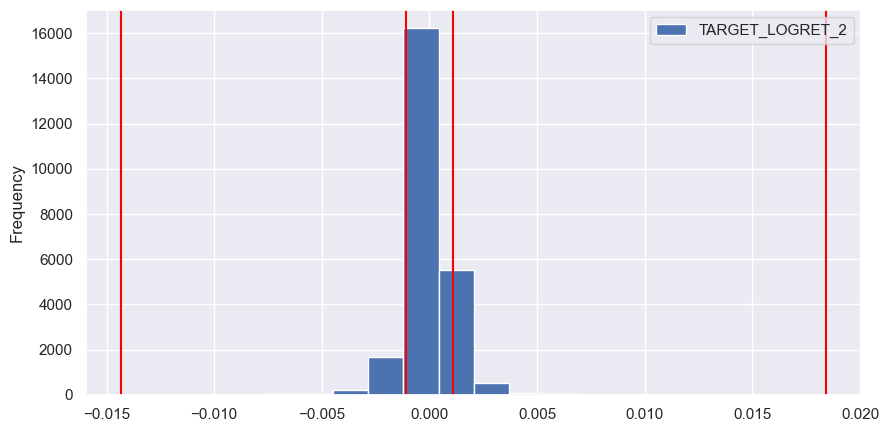

In [8]:
# visualizing potential labels
std = targets[target_col].std()
mean = targets[target_col].mean()
max = targets[target_col].max()
min = targets[target_col].min()

targets.plot.hist(bins=20)
plt.axvline(min, color="red")
plt.axvline(mean-std, color="red")
plt.axvline(mean+std, color="red")
plt.axvline(max, color="red")

In [9]:
# Create labels from target
std = targets[target_col].std()
mean = targets[target_col].mean()
max = targets[target_col].max()
min = targets[target_col].min()

std_n = 1
bins = pd.cut(targets[target_col], 
              bins=[min-1, mean- std_n *std, mean+ std_n * std, max+1],
              labels=["UP", "NEUTRAL", "DOWN"]
             )
labels = pd.DataFrame(bins)
labels.columns=["LABEL"]
labels = labels.replace("UP", 1)
labels = labels.replace("DOWN", 1)
labels = labels.replace("NEUTRAL", 0)
labels.value_counts()

LABEL
0        19764
1         4649
Name: count, dtype: int64

<Axes: xlabel='Timestamp', ylabel='LABEL'>

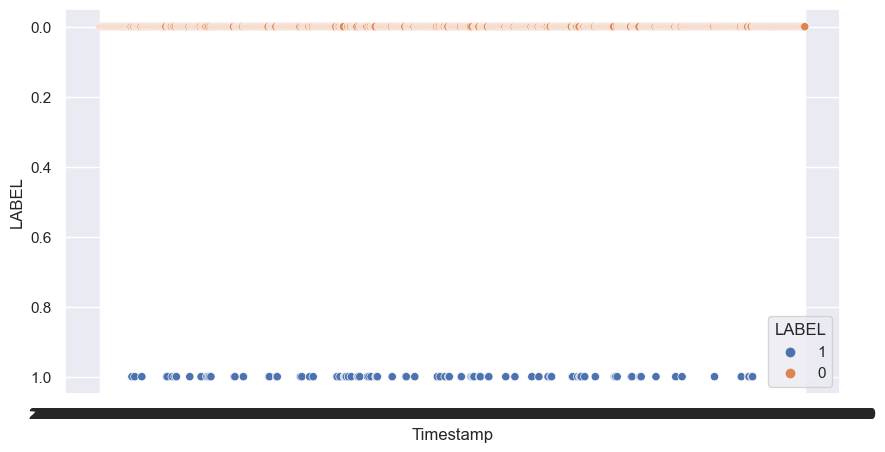

In [10]:
# plot labels
sns.scatterplot(x="Timestamp", y = "LABEL", data=labels.head(1000), hue="LABEL")

In [11]:
# select highest correlation feature

mutual_info = pd.DataFrame(mutual_info_classif(features, labels), index=features.columns, columns=["Mutual_Info"]).sort_values(by=["Mutual_Info"])
print(mutual_info)
selected_cols = mutual_info.index[-2:].values


print(selected_cols)
# feature 0 and 7 has the highest corr
features_selected = features[selected_cols]
features_selected


               Mutual_Info
WILLR_10          0.000028
RSI_5             0.001765
RSI_100           0.001920
RSI_10            0.002226
WILLR_5           0.002334
WILLR_500         0.002618
MACDs_12_26_9     0.003672
WILLR_100         0.004590
RSI_500           0.005291
MACD_12_26_9      0.005294
MACDh_12_26_9     0.006650
STDEV_100         0.012497
STDEV_500         0.025106
STDEV_10          0.026761
STDEV_5           0.032255
NATR_100          0.038129
NATR_500          0.038697
ATRr_100          0.039657
ATRr_500          0.040467
ATRr_10           0.041732
SMA_10            0.042213
SMA_5             0.045764
NATR_10           0.048499
ATRr_5            0.048809
SMA_100           0.055934
NATR_5            0.061367
SMA_500           0.068362
['NATR_5' 'SMA_500']


,NATR_5,SMA_500
Timestamp,,
2021-01-18 10:00:00,-0.305690,1.366450
2021-01-18 10:30:00,-0.250522,1.366016
2021-01-18 11:00:00,-0.343097,1.365568
2021-01-18 11:30:00,-0.256955,1.365072
2021-01-18 12:00:00,-0.293555,1.364587
...,...,...
2022-12-30 20:00:00,0.432278,-0.722303
2022-12-30 20:30:00,0.318399,-0.722135
2022-12-30 21:00:00,0.081809,-0.721986


In [12]:
# save labels and features
features_selected.to_csv("./data/features.csv")
labels.to_csv("./data/labels.csv")